In [24]:
import matplotlib.pyplot as plt
import torch, torch.nn as nn
from tqdm import trange

from Datasets.datasets import MNIST_DataLoader, stratified_split
from Models.sequential import Sequential_Model
from Layers.linear import LinearLayer
from Layers.conv import Conv2DLayer
from Activations.relu import relu
from Activations.sigmoid import sigmoid
from Loss_Func.log_loss import log_loss
from Metrics.acc import accuracy
from Layers.flatten import Flatten

In [25]:
mnist_dataloader = MNIST_DataLoader("./Datasets/MNIST/")
X_train, y_train, X_test, y_test = mnist_dataloader.load_data()

In [26]:
X_train, y_train, X_val, y_val = stratified_split(X_train, y_train, val_split=0.2)

In [27]:
X_train.shape, X_val.shape, X_test.shape

((47995, 28, 28), (12005, 28, 28), (10000, 28, 28))

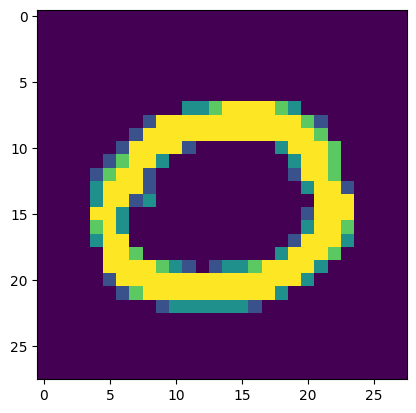

In [28]:
plt.imshow(X_train[0])

In [29]:
X_train = torch.unsqueeze( torch.tensor(X_train), 1)
y_train = torch.tensor(y_train==5, dtype=torch.int8)

shuffled_idxs = torch.randperm(y_train.shape[0])
X_train, y_train = X_train[shuffled_idxs], y_train[shuffled_idxs]

In [30]:
model = Sequential_Model(
            [Conv2DLayer(window_size=(3,3), channels_in=1, channels_out=8),
             relu(),
             Conv2DLayer(window_size=(3,3), channels_in=8, channels_out=4),
             relu(),
             Flatten(),
             LinearLayer(24*24*4,1),
             sigmoid()], log_loss
        )

In [31]:
preds = model.forward_pass(X_train[:32])
print(preds )

tensor([[9.9687e-01, 1.0000e+00, 1.4603e-01, 9.8726e-04, 1.0000e+00, 1.9275e-05,
         4.3962e-13, 3.9776e-04, 6.5995e-04, 1.2249e-04, 2.4854e-04, 6.6845e-30,
         9.6943e-03, 5.2967e-20, 1.6770e-02, 1.1333e-01, 2.0205e-11, 1.0000e+00,
         9.9742e-01, 3.5289e-06, 2.7185e-02, 1.5373e-02, 1.4161e-17, 4.8793e-23,
         1.5846e-03, 4.5547e-08, 9.2964e-01, 8.3114e-18, 1.0000e+00, 9.9933e-01,
         1.9856e-11, 9.7364e-14]])


In [32]:
loss = model.loss_calc(y_train[:32], preds)

In [33]:
model.backward_pass()

In [34]:
epochs = 1
loss_history = []
acc_history = []

for i in range(epochs):
    for idx in trange(0,X_train.shape[0]//32):
        preds = model.forward_pass(X_train[32*idx:32*(idx+1)])
        #print(preds, y_train[idx])
        loss = model.loss_calc(y_train[32*idx:32*(idx+1)], preds)
        model.backward_pass()
        model.step(1e-5)
        
        loss_history.append(loss)
        acc_history.append(accuracy(torch.Tensor([y_train[idx]]), preds))

100%|█████████████████████████████████████████| 1499/1499 [02:32<00:00,  9.84it/s]


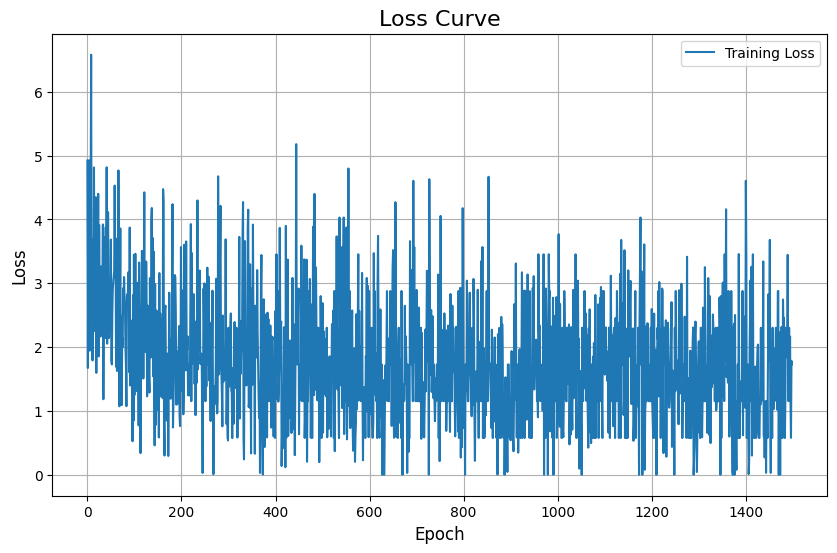

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(loss_history)), loss_history, label='Training Loss')
plt.title('Loss Curve', fontsize=16)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend()
plt.grid(True)

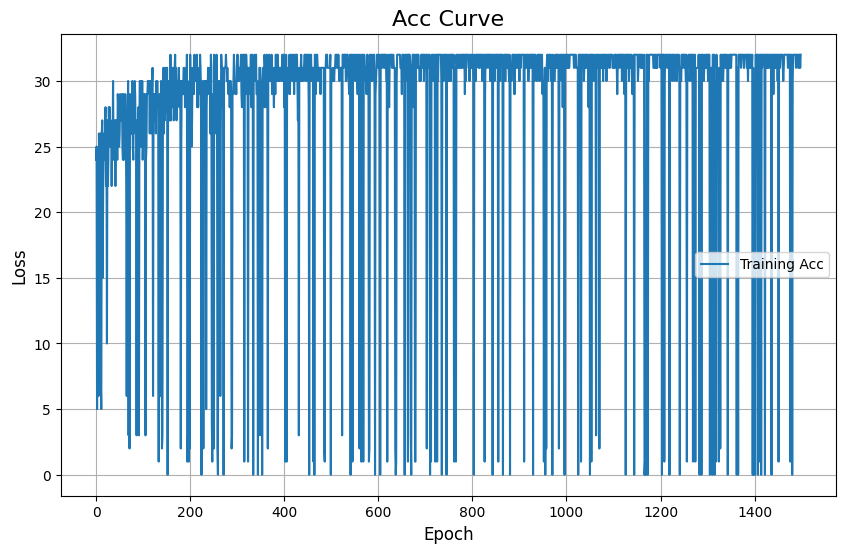

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(acc_history)), acc_history, label='Training Acc')
plt.title('Acc Curve', fontsize=16)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend()
plt.grid(True)